In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p


In [23]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [24]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [25]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim=256

In [26]:
#Autoencoder Arch-1
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

encodedOut=Dense(encodingDim,activation='sigmoid')(inp)

Encoder1=Model(xInp,encodedOut,name='encoder')


decodedOut=Dense(784,activation='sigmoid')(encodedOut)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

In [27]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr[0])

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 797us/step - loss: 0.0014 - accuracy: 0.3855
Train Data: 0.0014220414450392127
3795/3795 [==============================] - 3s 793us/step - loss: 0.0018 - accuracy: 0.3805
Validation Data: 0.0018130767857655883
3795/3795 [==============================] - 3s 791us/step - loss: 0.0019 - accuracy: 0.3820
Test Data: 0.001857446739450097


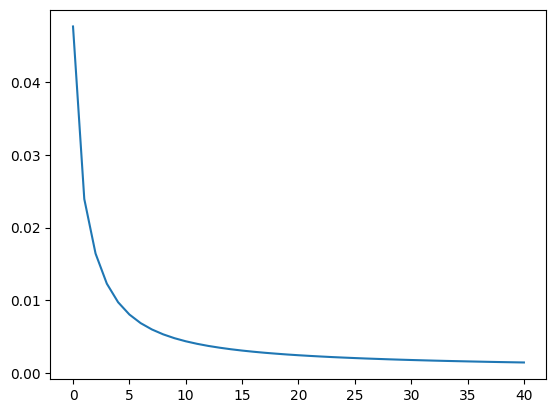

In [129]:
'''visualization-Task2-d'''

plt.plot(ae1history.history['loss'])

In [107]:
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
testReconstruct=Autoencoder1.predict(Input_test_Dataset)
valReconstruct=Autoencoder1.predict(Input_val_Dataset)

119/119 [==============================] - 0s 1ms/step


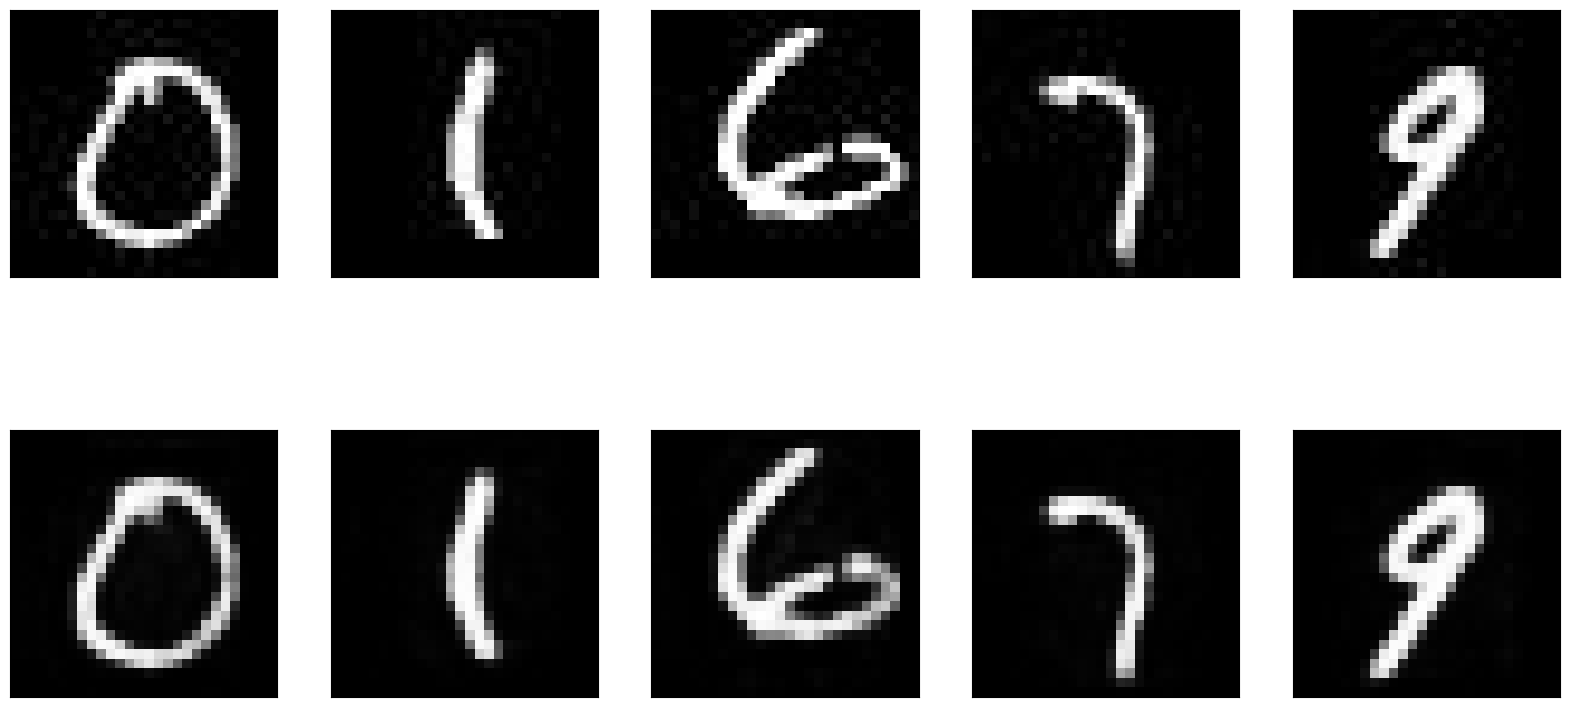

In [130]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


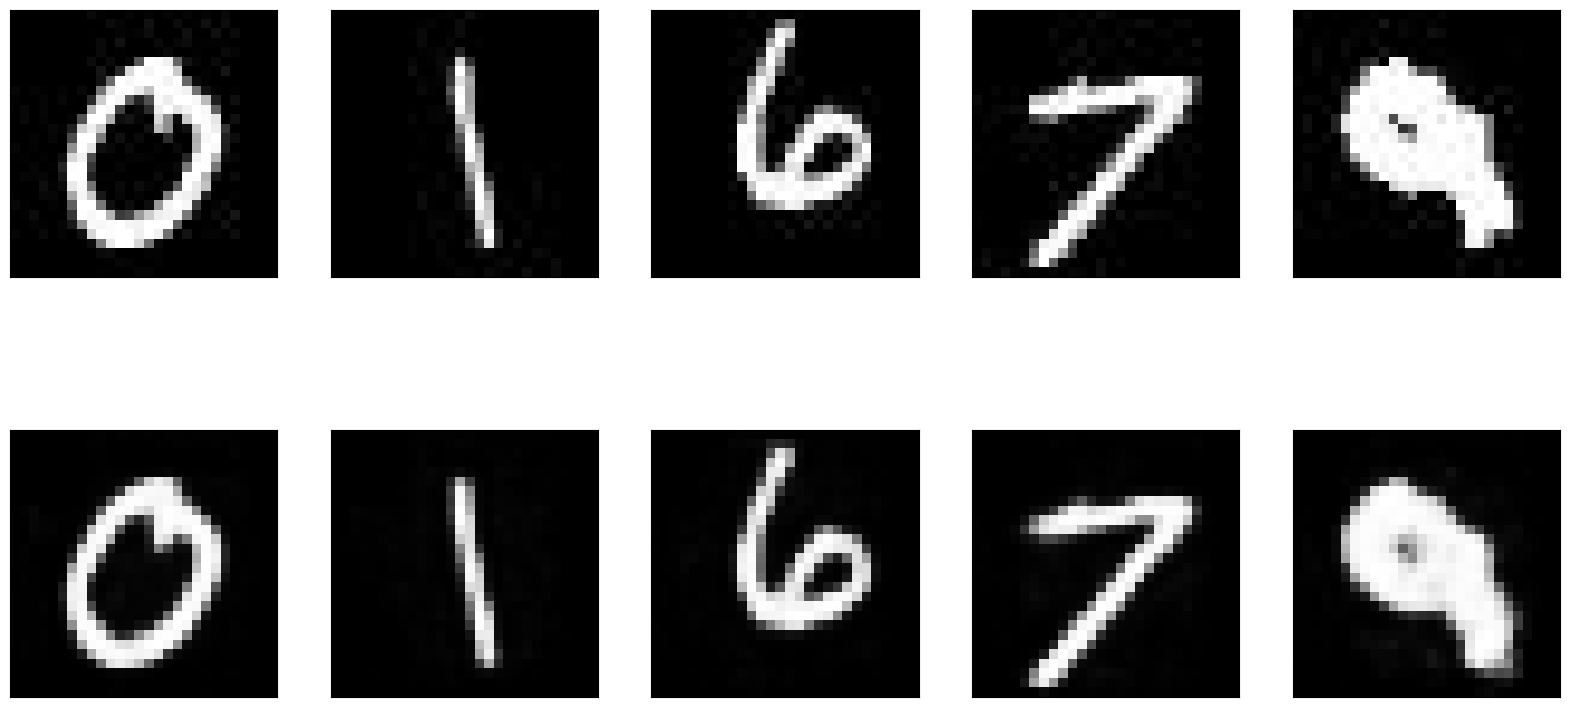

In [112]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

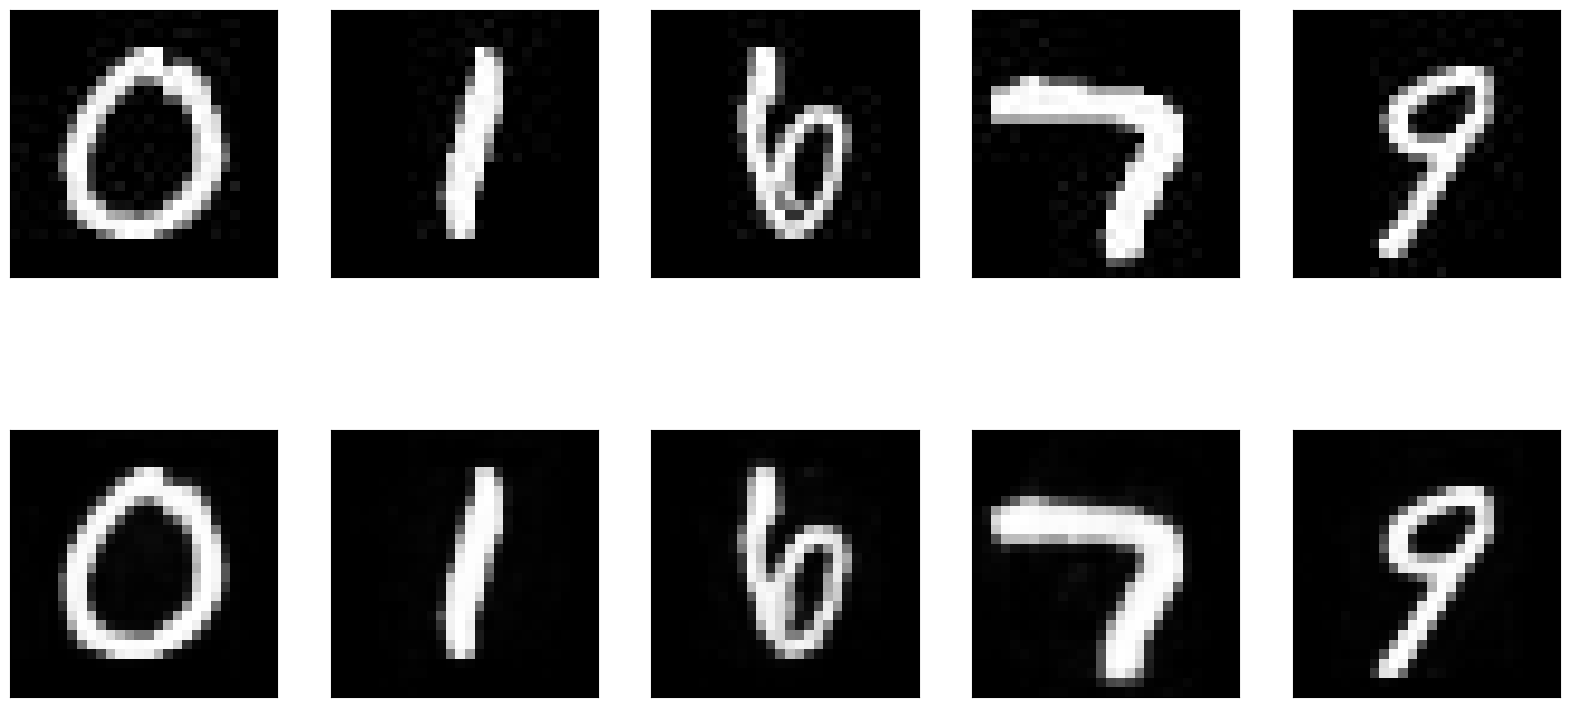

In [113]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [70]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights = Autoencoder1.layers[2].get_weights()[0]
print(weights.shape)
print(weights)

(784, 256)
[[-0.06813955  0.07731405 -0.02052115 ... -0.04050618 -0.03220654
  -0.01162383]
 [ 0.08207948  0.03756848 -0.01326536 ... -0.01837483 -0.00378508
   0.03850571]
 [-0.04231526 -0.019581   -0.05665405 ... -0.06992822 -0.05706059
  -0.02828337]
 ...
 [-0.01401336  0.04044297  0.04784602 ...  0.06440952  0.06226619
   0.05518769]
 [-0.00605875 -0.04439953 -0.03826674 ...  0.06431901  0.03643199
   0.01903666]
 [ 0.03706798  0.07007213 -0.02798928 ... -0.05313351  0.06163829
  -0.01534383]]


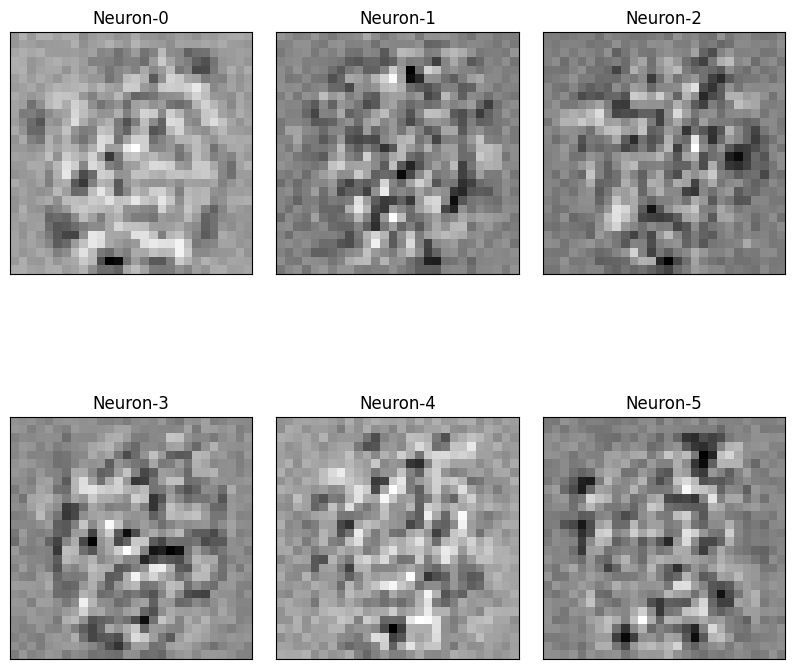

In [100]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

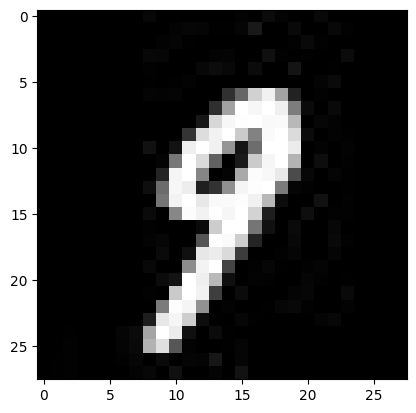

In [31]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

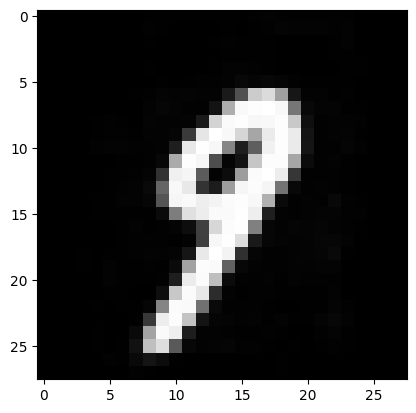

In [32]:
plt.imshow(trainReconstruct[0].reshape(28,28),cmap='gray')

In [33]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

'''Fcnn'''
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/ae256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae256.pckl','wb')
p.dump(model_fit.history,f)
f.close()




119/119 [==============================] - 0s 733us/step
Epoch 1/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.4545 - accuracy: 0.8314 - val_loss: 0.1275 - val_accuracy: 0.9592
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1253 - accuracy: 0.9592 - val_loss: 0.0948 - val_accuracy: 0.9700
Epoch 3/10000
356/356 [==============================] - 6s 17ms/step - loss: 0.1035 - accuracy: 0.9671 - val_loss: 0.0900 - val_accuracy: 0.9708
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0971 - accuracy: 0.9691 - val_loss: 0.0950 - val_accuracy: 0.9679
Epoch 5/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0887 - accuracy: 0.9705 - val_loss: 0.0944 - val_accuracy: 0.9676
Epoch 6/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0872 - accuracy: 0.9711 - val_loss: 0.1098 - val_accuracy: 0.9618
Epoch 7/10000
356/356 [==============================] - 6s 16ms/st

In [34]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=tf.math.confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)


Evaluation of model on train data:
11385/11385 [==============================] - 12s 1ms/step - loss: 0.0063 - accuracy: 0.9982
['loss', 'accuracy']
[0.006300652865320444, 0.9981554746627808]

Evaluation of model on validation data:
3795/3795 [==============================] - 4s 1ms/step - loss: 0.0655 - accuracy: 0.9855
['loss', 'accuracy']
[0.06546201556921005, 0.9855072498321533]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 871us/step - loss: 0.0818 - accuracy: 0.9808
['loss', 'accuracy']
[0.08178069442510605, 0.9807641506195068]

Predictions for test data:
3795/3795 [==============================] - 3s 799us/step
[4 4 4 ... 1 1 1]
tf.Tensor(
[[747   1   4   2   5]
 [  0 751   1   6   1]
 [  3   6 745   1   4]
 [  2   2   0 737  18]
 [  4   4   0   9 742]], shape=(5, 5), dtype=int32)


In [35]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [36]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val

In [37]:
#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim2=128

In [38]:
#Autoencoder Arch-1
xInp2=Input(shape=(28,28),name="img")
inp2=Flatten(input_shape=(28, 28), name='InputLayer')(xInp2)

encodedOut2=Dense(encodingDim2,activation='sigmoid')(inp2)

Encoder2=Model(xInp2,encodedOut2,name='encoder')


decodedOut2=Dense(784,activation='sigmoid')(encodedOut2)
out2=Reshape((28,28))(decodedOut2)
optimizer2=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder2=Model(xInp2,out2,name='AutoencoderA1')
Autoencoder2.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder2.compile(optimizer2, loss='mse',metrics=['accuracy'])
ae2history=Autoencoder2.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.3739 - val_loss: 0.0027 - val_accuracy: 0.3716
Epoch 51/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.3748 - val_loss: 0.0026 - val_accuracy: 0.3729
Epoch 52/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.3753 - val_loss: 0.0026 - val_accuracy: 0.3726
Epoch 52: early stopping


In [39]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr2=Autoencoder2.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr2[0])

#print('\nEvaluation of model on validation data:')
valErr2=Autoencoder2.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr2[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr2=Autoencoder2.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr2[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 811us/step - loss: 0.0021 - accuracy: 0.3755
Train Data: 0.002141921781003475
3795/3795 [==============================] - 3s 801us/step - loss: 0.0026 - accuracy: 0.3726
Validation Data: 0.002597594168037176
3795/3795 [==============================] - 3s 815us/step - loss: 0.0027 - accuracy: 0.3736
Test Data: 0.0026820707134902477


356/356 [==============================] - 0s 797us/step


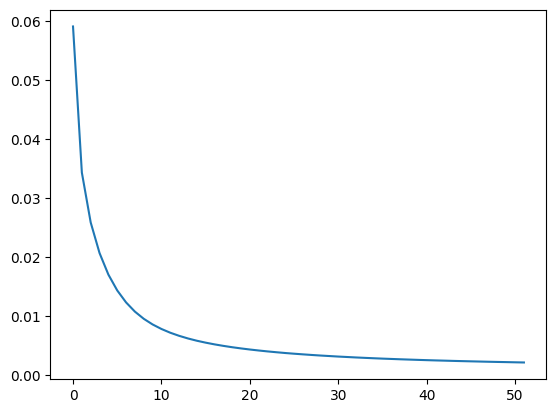

In [40]:
plt.plot(ae2history.history['loss'])

In [115]:
'''visualization-Task2-d'''
trainReconstruct2=Autoencoder2.predict(Input_train_Dataset)
testReconstruct2=Autoencoder2.predict(Input_test_Dataset)
valReconstruct2=Autoencoder2.predict(Input_val_Dataset)

119/119 [==============================] - 0s 938us/step


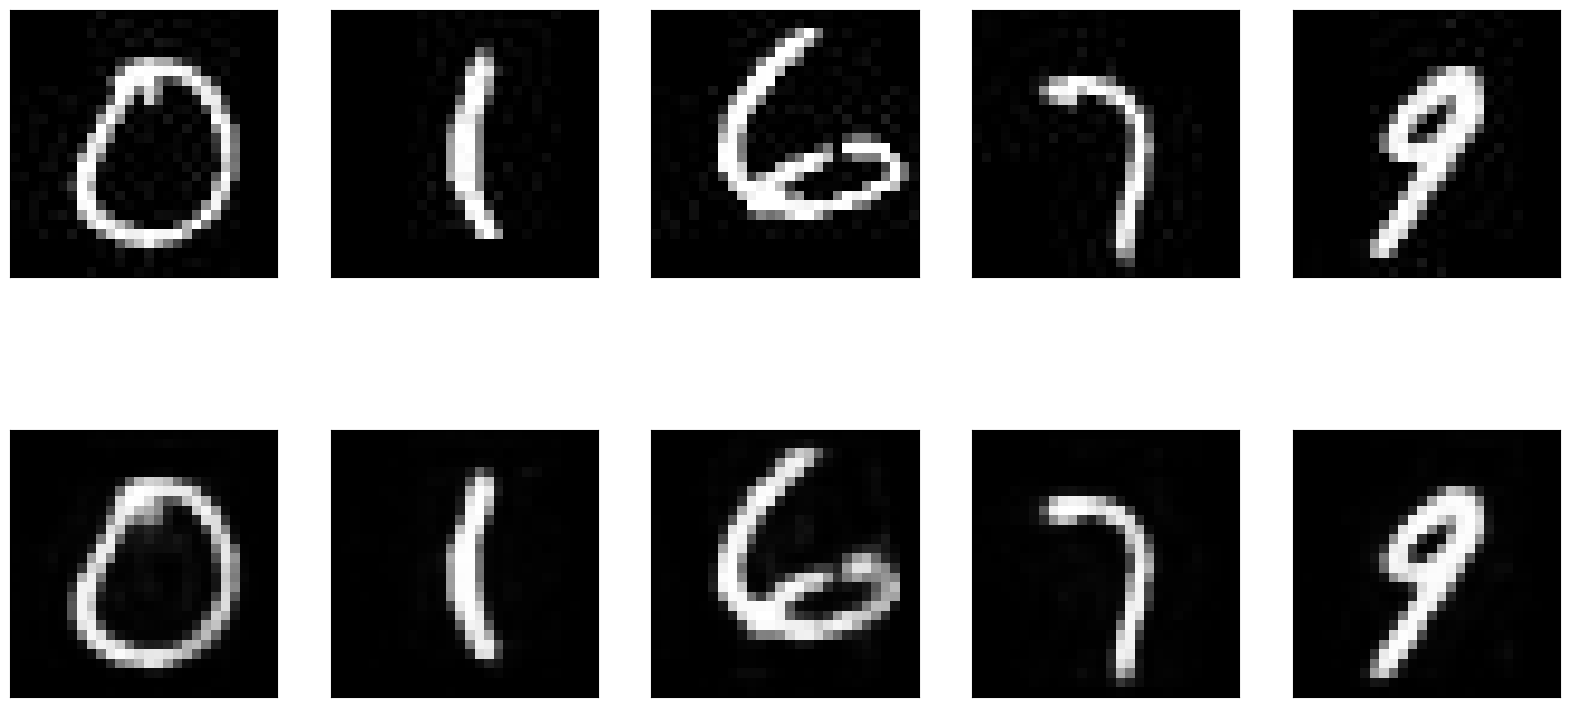

In [133]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

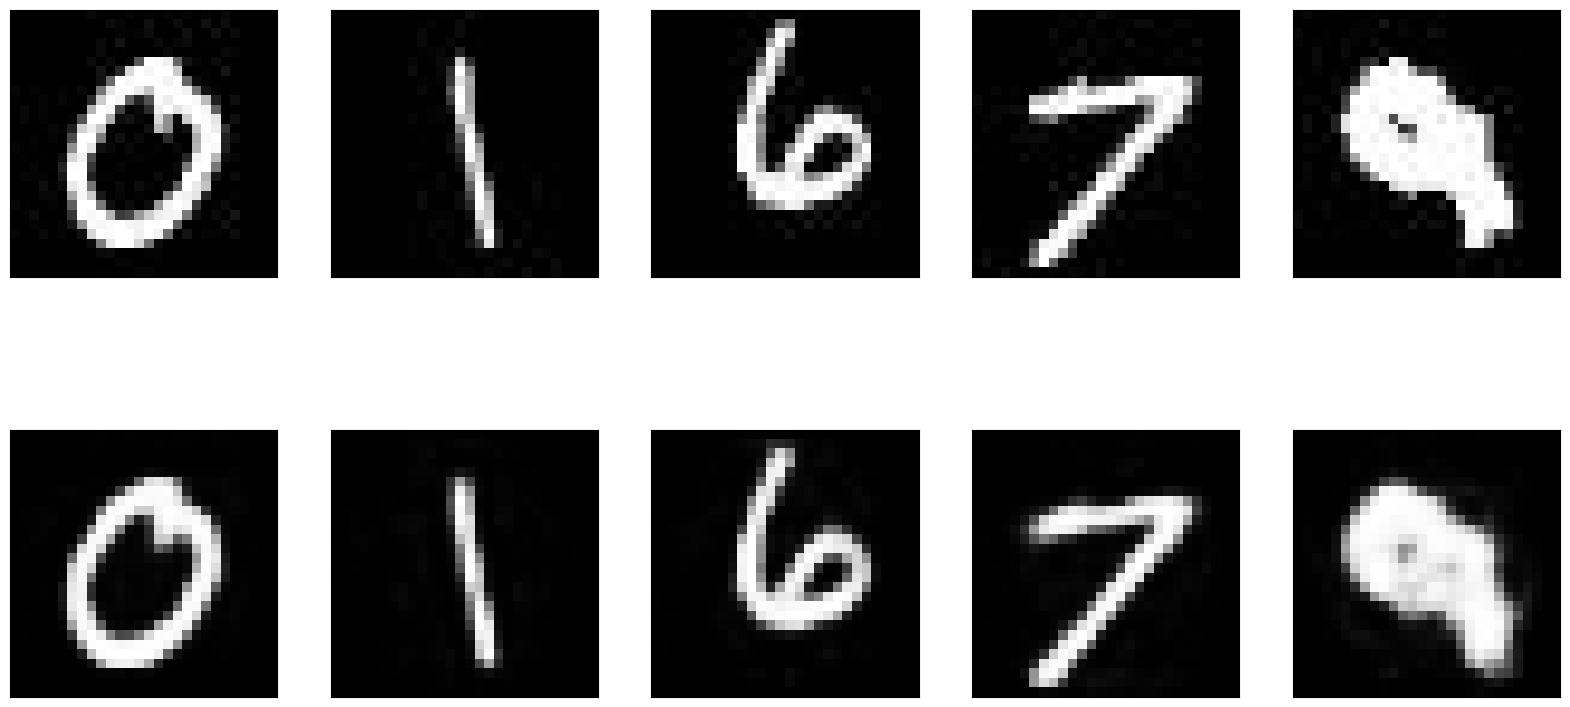

In [134]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

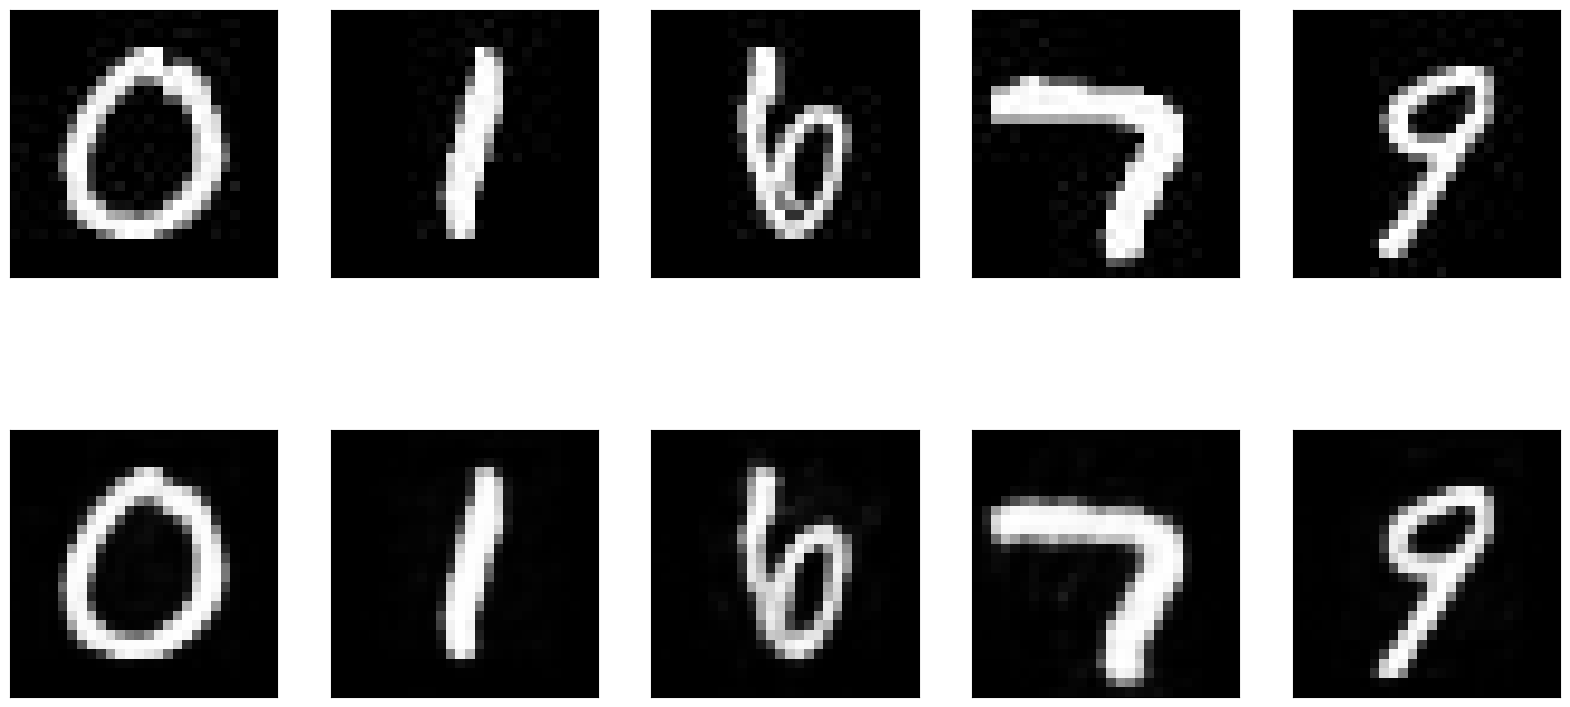

In [135]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct2[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [101]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights2 = Autoencoder2.layers[2].get_weights()[0]
print(weights2.shape)
print(weights2)

(784, 128)
[[ 0.03778599 -0.00322909  0.09065832 ...  0.08870623  0.06624962
  -0.05131529]
 [ 0.12455434  0.05390148  0.01622334 ... -0.03090109 -0.05656727
   0.05581863]
 [ 0.08282917  0.05936097  0.0858405  ... -0.11345994 -0.04944542
   0.09130861]
 ...
 [-0.03354355  0.057321    0.03164668 ...  0.03291738 -0.0625178
  -0.01014443]
 [ 0.05187777 -0.06497171 -0.00580323 ...  0.01023871  0.07664441
  -0.04160245]
 [ 0.04584013  0.07655636 -0.00066852 ...  0.01694594 -0.02279728
   0.03397782]]


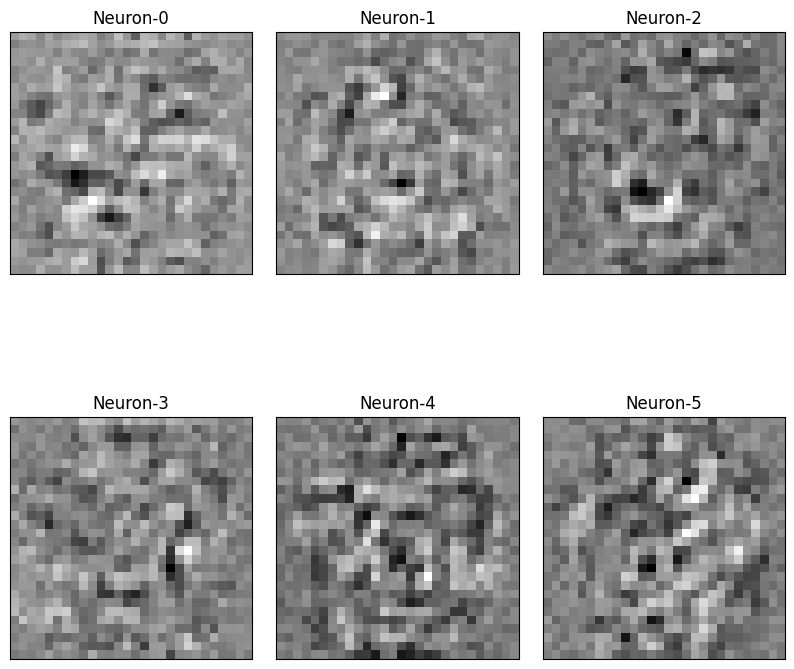

In [102]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights2.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [42]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode2=Encoder2.predict(Input_train_Dataset)
valEncode2=Encoder2.predict(Input_val_Dataset)
testEncode2=Encoder2.predict(Input_test_Dataset)

#Fcnn
model2 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit2 = model2.fit(x = trainEncode2, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode2,  Output_val), validation_batch_size=1)

model2.save('/Users/vds/Downloads/modelAssign4/ae128.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae128.pckl','wb')
p.dump(model_fit2.history,f)
f.close()

119/119 [==============================] - 0s 709us/step
Epoch 1/10000
356/356 [==============================] - 6s 15ms/step - loss: 0.5389 - accuracy: 0.7879 - val_loss: 0.2684 - val_accuracy: 0.9123
Epoch 2/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1344 - accuracy: 0.9560 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 3/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1197 - accuracy: 0.9612 - val_loss: 0.1043 - val_accuracy: 0.9671
Epoch 4/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1041 - accuracy: 0.9664 - val_loss: 0.0918 - val_accuracy: 0.9676
Epoch 5/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1044 - accuracy: 0.9658 - val_loss: 0.0887 - val_accuracy: 0.9673
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.0938 - accuracy: 0.9697 - val_loss: 0.0856 - val_accuracy: 0.9708
Epoch 7/10000
356/356 [==============================] - 5s 15ms/st

In [43]:
trainEncode2.shape

(11385, 128)

In [44]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc2=model2.evaluate(x=trainEncode2,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(trainAcc2)

print('\nEvaluation of model on validation data:')
valAcc2=model2.evaluate(x=valEncode2, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(valAcc2)

print('\nEvaluation of model on test data:')
testAcc2=model2.evaluate(x=testEncode2, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model2.metrics_names)
print(testAcc2)

print('\nPredictions for test data:')
testProb2=model2.predict(testEncode2, batch_size=1, verbose="auto", callbacks=None)
pred2=np.argmax(testProb2,axis=1)
print(pred2)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 793us/step - loss: 0.0083 - accuracy: 0.9969
['loss', 'accuracy']
[0.008265540935099125, 0.9969257712364197]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 800us/step - loss: 0.0675 - accuracy: 0.9839
['loss', 'accuracy']
[0.06748813390731812, 0.9839262366294861]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 817us/step - loss: 0.0834 - accuracy: 0.9823
['loss', 'accuracy']
[0.08344695717096329, 0.9823451638221741]

Predictions for test data:
3795/3795 [==============================] - 3s 675us/step
[4 4 4 ... 1 1 1]


In [45]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix2=tf.math.confusion_matrix(Output_test,pred2)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix2)

tf.Tensor(
[[747   1   5   2   4]
 [  0 749   3   5   2]
 [  2   3 748   2   4]
 [  0   1   1 741  16]
 [  4   0   0  12 743]], shape=(5, 5), dtype=int32)


In [46]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [47]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

In [48]:
#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=64

In [49]:
#Autoencoder Arch-1
xInp3=Input(shape=(28,28),name="img")
inp3=Flatten(input_shape=(28, 28), name='InputLayer')(xInp3)

encodedOut3=Dense(encodingDim3,activation='sigmoid')(inp3)

Encoder3=Model(xInp3,encodedOut3,name='encoder')


decodedOut3=Dense(784,activation='sigmoid')(encodedOut3)
out3=Reshape((28,28))(decodedOut3)
optimizer3=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder3=Model(xInp3,out3,name='AutoencoderA1')
Autoencoder3.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder3.compile(optimizer3, loss='mse',metrics=['accuracy'])
ae3history=Autoencoder3.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 784)               50960     
                                                                 
 reshape_4 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [=========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.3419 - val_loss: 0.0081 - val_accuracy: 0.3375
Epoch 51/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.3423 - val_loss: 0.0079 - val_accuracy: 0.3391
Epoch 52/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.3435 - val_loss: 0.0077 - val_accuracy: 0.3393
Epoch 53/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.3441 - val_loss: 0.0076 - val_accuracy: 0.3406
Epoch 54/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.3446 - val_loss: 0.0075 - val_accuracy: 0.3421
Epoch 55/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.3452 - val_loss: 0.0074 - val_accuracy: 0.3418
Epoch 56/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.3462 - val_loss: 0.0072 - val_accuracy: 0.3428

In [50]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr3=Autoencoder3.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr3[0])

#print('\nEvaluation of model on validation data:')
valErr3=Autoencoder3.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr3[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr3=Autoencoder3.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr3[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 784us/step - loss: 0.0037 - accuracy: 0.3615
Train Data: 0.0037237827200442553
3795/3795 [==============================] - 3s 782us/step - loss: 0.0042 - accuracy: 0.3581
Validation Data: 0.004236957989633083
3795/3795 [==============================] - 3s 786us/step - loss: 0.0043 - accuracy: 0.3596
Test Data: 0.004334831610321999


356/356 [==============================] - 0s 812us/step


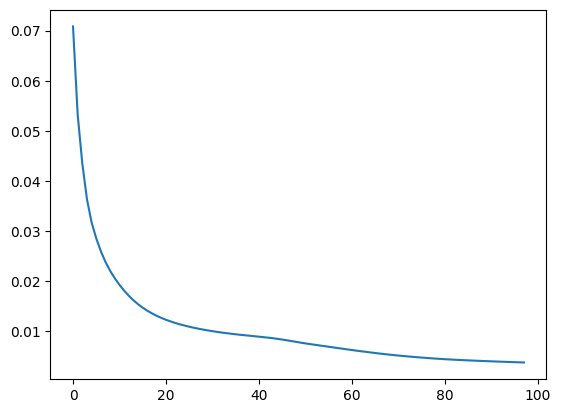

In [51]:
plt.plot(ae3history.history['loss'])

In [121]:
'''visualization-Task2-d'''
trainReconstruct3=Autoencoder3.predict(Input_train_Dataset)
valReconstruct3=Autoencoder3.predict(Input_val_Dataset)
testReconstruct3=Autoencoder3.predict(Input_test_Dataset)

119/119 [==============================] - 0s 806us/step


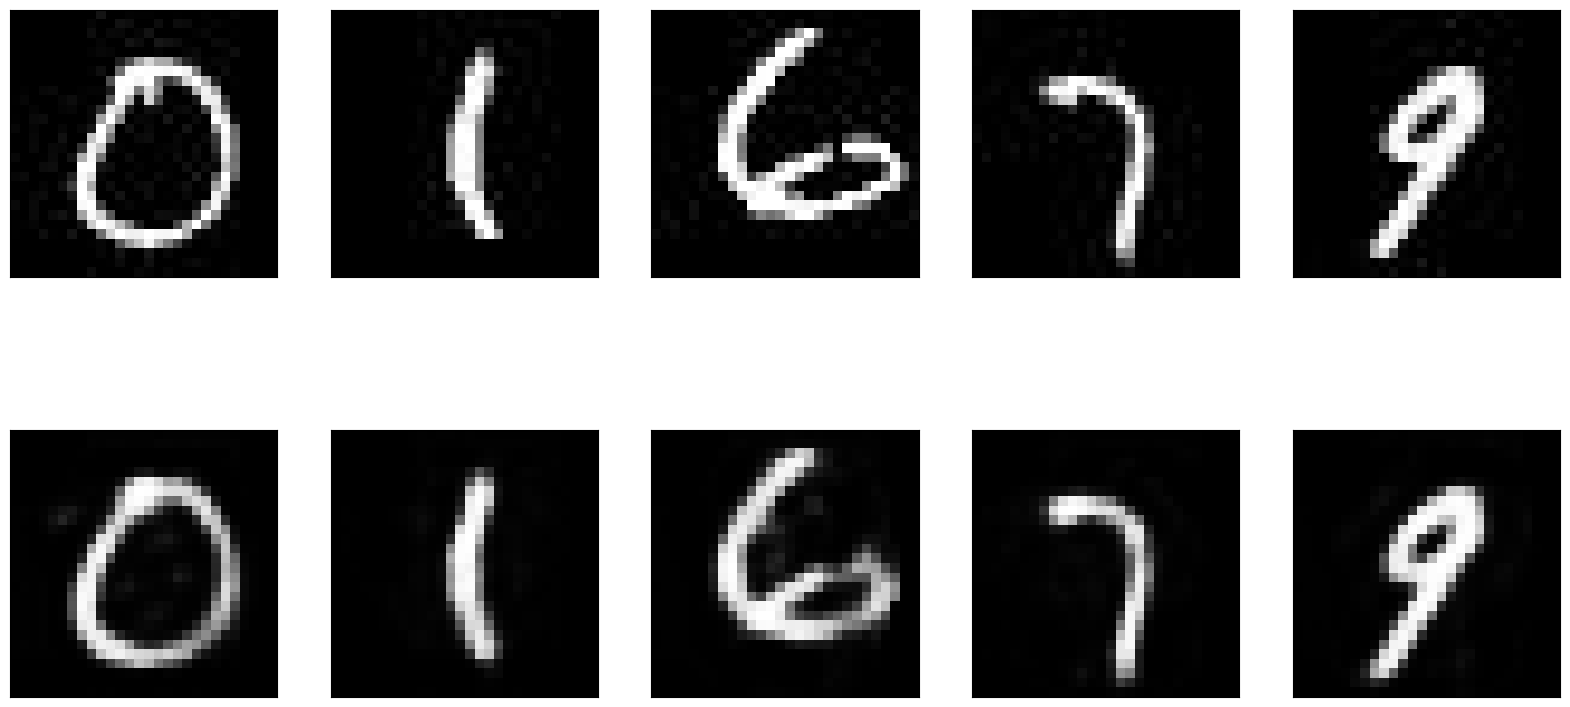

In [122]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

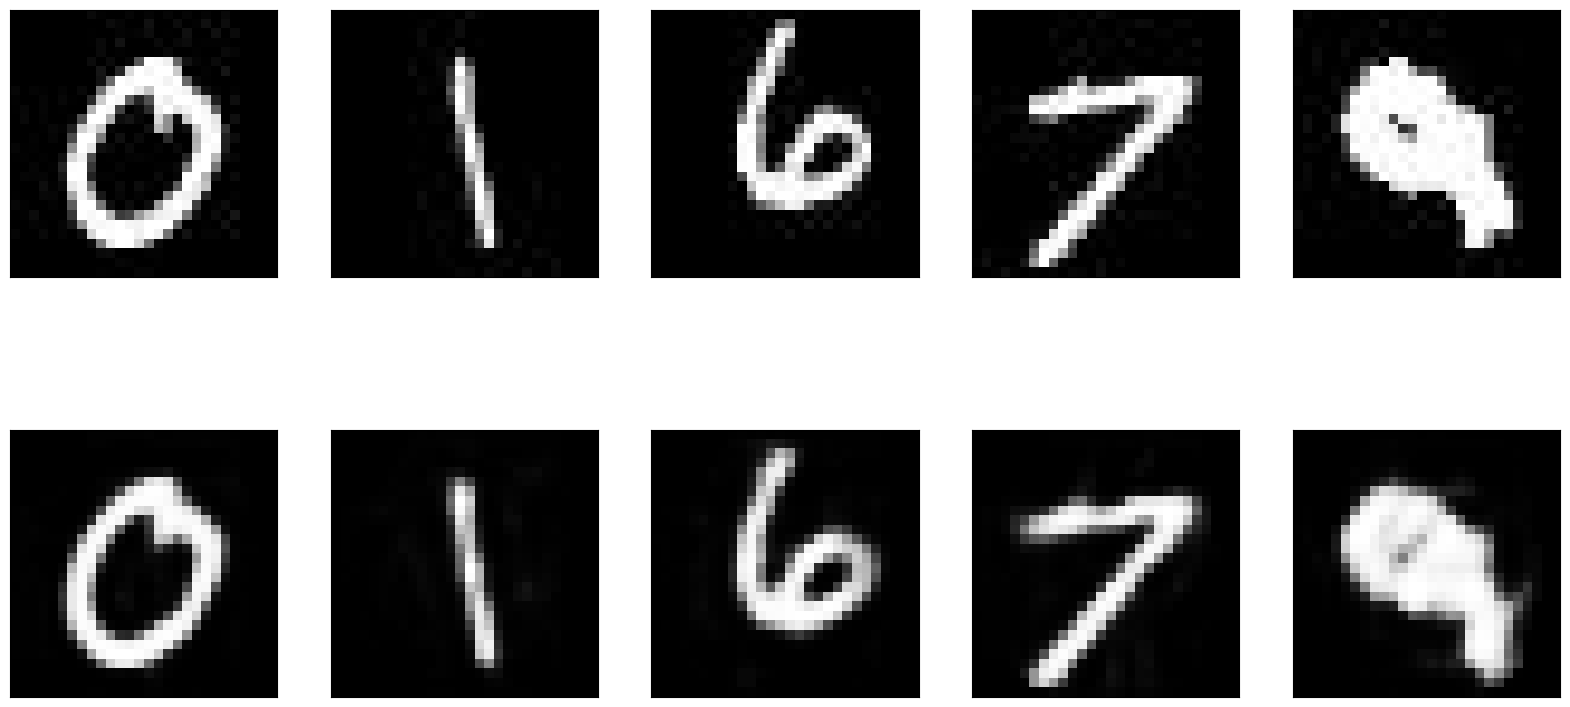

In [123]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

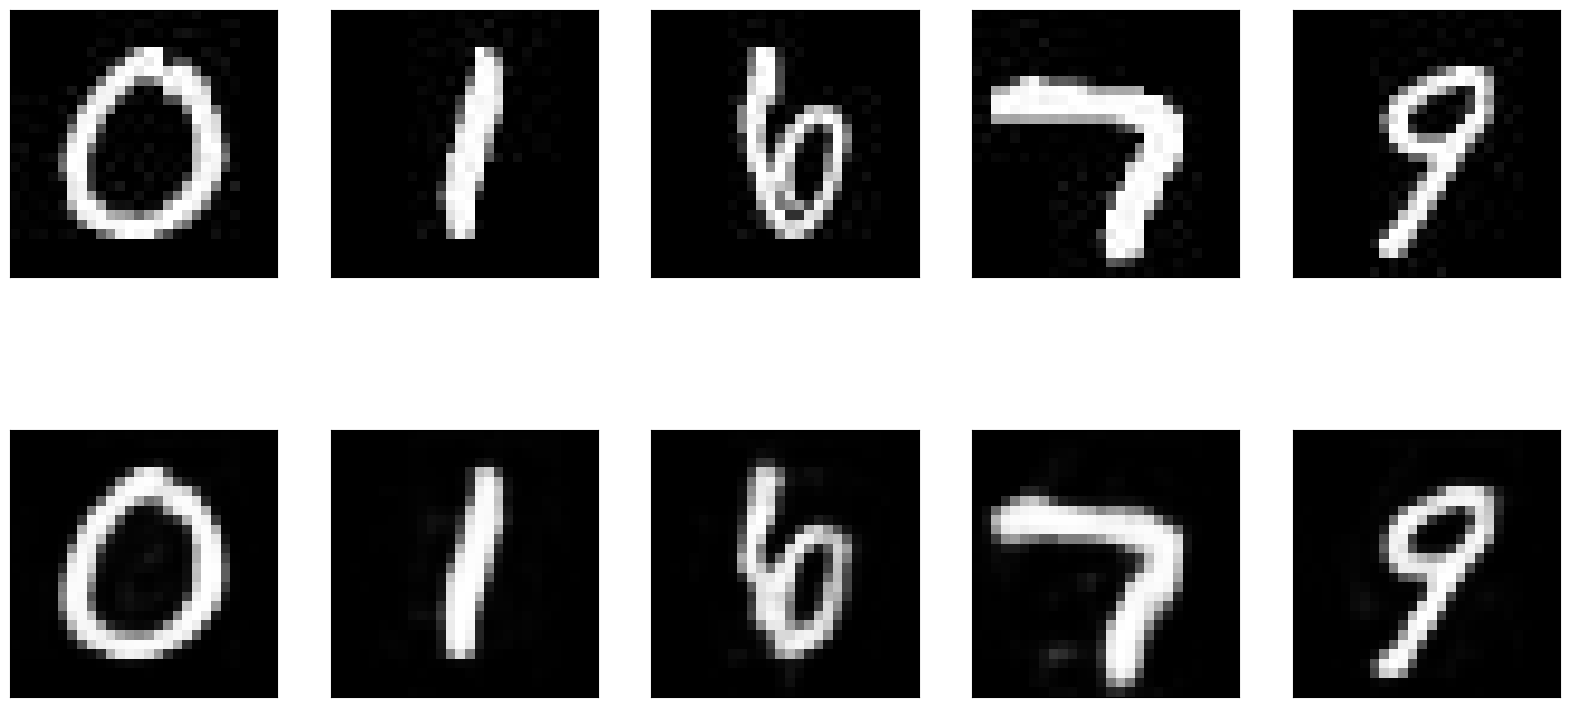

In [124]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [103]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights3 = Autoencoder3.layers[2].get_weights()[0]
print(weights3.shape)
print(weights3)

(784, 64)
[[ 0.02503739  0.18305886  0.01732464 ...  0.04719388 -0.03890939
   0.10890174]
 [ 0.02164753 -0.08273397  0.01670236 ... -0.04076581  0.20892344
  -0.04174246]
 [ 0.04219975 -0.21014355  0.05585306 ...  0.02787882  0.13452262
  -0.06340575]
 ...
 [ 0.04389549  0.02090929 -0.05682287 ...  0.00352422 -0.00375375
  -0.07151104]
 [ 0.00247243  0.00772788  0.06709105 ...  0.01581795  0.00826369
  -0.03134293]
 [-0.00516918  0.04089339  0.04833943 ... -0.06739781  0.00467682
   0.06638831]]


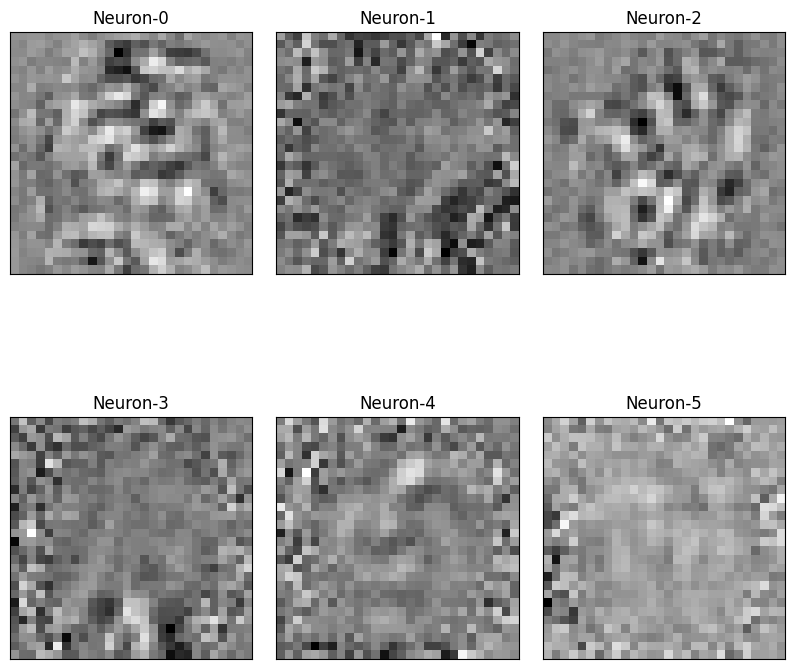

In [104]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights3.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

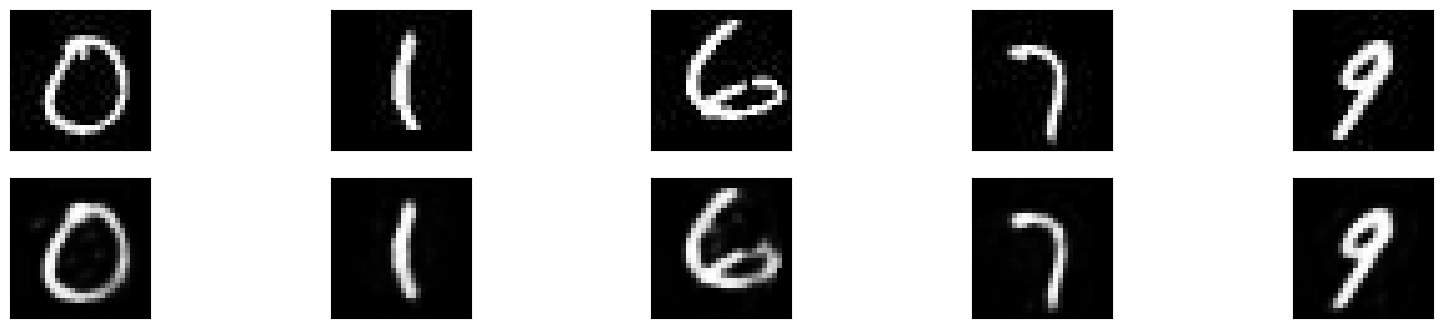

In [53]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct3[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

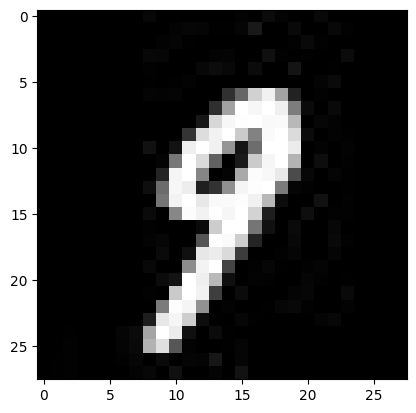

In [54]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

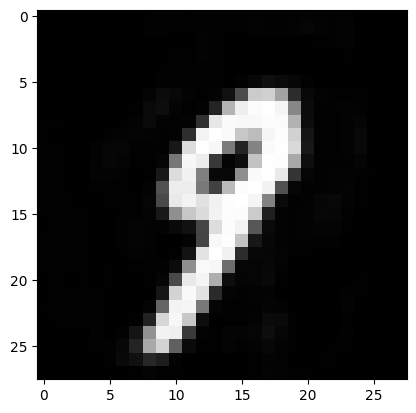

In [55]:
plt.imshow(trainReconstruct3[0].reshape(28,28),cmap='gray')

In [56]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode3=Encoder3.predict(Input_train_Dataset)
valEncode3=Encoder3.predict(Input_val_Dataset)
testEncode3=Encoder3.predict(Input_test_Dataset)

#Fcnn'''
model3 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit3 = model3.fit(x = trainEncode3, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode3,  Output_val), validation_batch_size=1)

model3.save('/Users/vds/Downloads/modelAssign4/ae64.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae64.pckl','wb')
p.dump(model_fit3.history,f)
f.close()

119/119 [==============================] - 0s 700us/step
Epoch 1/10000
356/356 [==============================] - 6s 14ms/step - loss: 0.8341 - accuracy: 0.6514 - val_loss: 0.1694 - val_accuracy: 0.9486
Epoch 2/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1659 - accuracy: 0.9448 - val_loss: 0.1306 - val_accuracy: 0.9576
Epoch 3/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1438 - accuracy: 0.9524 - val_loss: 0.1197 - val_accuracy: 0.9599
Epoch 4/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1365 - accuracy: 0.9566 - val_loss: 0.1195 - val_accuracy: 0.9613
Epoch 5/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1271 - accuracy: 0.9571 - val_loss: 0.1125 - val_accuracy: 0.9655
Epoch 6/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1202 - accuracy: 0.9613 - val_loss: 0.1371 - val_accuracy: 0.9599
Epoch 7/10000
356/356 [==============================] - 5s 14ms/st

In [57]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc3=model3.evaluate(x=trainEncode3,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(trainAcc3)

print('\nEvaluation of model on validation data:')
valAcc3=model3.evaluate(x=valEncode3, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(valAcc3)

print('\nEvaluation of model on test data:')
testAcc3=model3.evaluate(x=testEncode3, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model3.metrics_names)
print(testAcc3)

print('\nPredictions for test data:')
testProb3=model3.predict(testEncode3, batch_size=1, verbose="auto", callbacks=None)
pred3=np.argmax(testProb3,axis=1)
print(pred3)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 805us/step - loss: 0.0149 - accuracy: 0.9956
['loss', 'accuracy']
[0.014880732633173466, 0.9956082701683044]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 790us/step - loss: 0.0820 - accuracy: 0.9816
['loss', 'accuracy']
[0.08197983354330063, 0.9815546870231628]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 787us/step - loss: 0.0920 - accuracy: 0.9776
['loss', 'accuracy']
[0.09195305407047272, 0.9776021242141724]

Predictions for test data:
3795/3795 [==============================] - 3s 665us/step
[4 4 4 ... 1 1 1]


In [58]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix3=tf.math.confusion_matrix(Output_test,pred3)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix3)

tf.Tensor(
[[751   1   6   0   1]
 [  1 751   2   4   1]
 [  6   1 751   0   1]
 [  7   4   1 730  17]
 [ 13   5   0  14 727]], shape=(5, 5), dtype=int32)


In [59]:
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"

#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)

In [60]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
#bottleneck dimension
encodingDim3=32

In [61]:
#Autoencoder Arch-1
xInp4=Input(shape=(28,28),name="img")
inp4=Flatten(input_shape=(28, 28), name='InputLayer')(xInp4)

encodedOut4=Dense(encodingDim3,activation='sigmoid')(inp4)

Encoder4=Model(xInp4,encodedOut4,name='encoder')


decodedOut4=Dense(784,activation='sigmoid')(encodedOut4)
out4=Reshape((28,28))(decodedOut4)
optimizer4=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder4=Model(xInp4,out4,name='AutoencoderA1')
Autoencoder4.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder4.compile(optimizer4, loss='mse',metrics=['accuracy'])
ae4history=Autoencoder4.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 1000, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
 reshape_5 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
356/356 [===========================

356/356 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.2193 - val_loss: 0.0333 - val_accuracy: 0.2208
Epoch 51/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.2197 - val_loss: 0.0332 - val_accuracy: 0.2206
Epoch 52/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.2197 - val_loss: 0.0332 - val_accuracy: 0.2191
Epoch 53/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.2198 - val_loss: 0.0332 - val_accuracy: 0.2206
Epoch 54/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.2206 - val_loss: 0.0331 - val_accuracy: 0.2208
Epoch 55/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.2203 - val_loss: 0.0330 - val_accuracy: 0.2215
Epoch 56/1000
356/356 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.2208 - val_loss: 0.0331 - val_accuracy: 0.2220

In [62]:
#Reconstruction Error-2c
print('\nAverage reconstruction Loss :')
trainErr4=Autoencoder4.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr4[0])

#print('\nEvaluation of model on validation data:')
valErr4=Autoencoder4.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Validation Data:',valErr4[0])

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr4=Autoencoder4.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr4[0])


Average reconstruction Loss :
11385/11385 [==============================] - 9s 774us/step - loss: 0.0329 - accuracy: 0.2200
Train Data: 0.0328768827021122
3795/3795 [==============================] - 3s 776us/step - loss: 0.0330 - accuracy: 0.2205
Validation Data: 0.03298317641019821
3795/3795 [==============================] - 3s 774us/step - loss: 0.0332 - accuracy: 0.2190
Test Data: 0.033235397189855576


356/356 [==============================] - 0s 689us/step


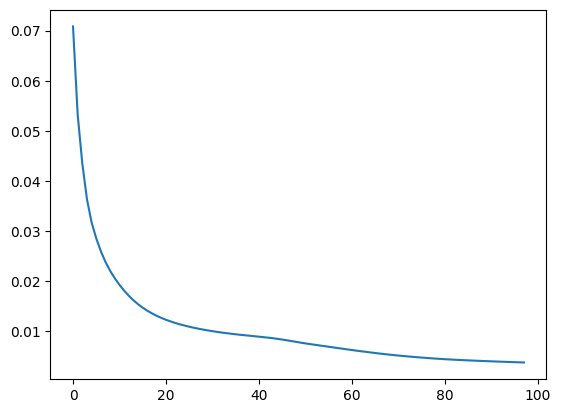

In [63]:
plt.plot(ae3history.history['loss'])

In [126]:
'''visualization-Task2-d'''
trainReconstruct4=Autoencoder4.predict(Input_train_Dataset)
valReconstruct4=Autoencoder4.predict(Input_val_Dataset)
testReconstruct4=Autoencoder4.predict(Input_test_Dataset)

119/119 [==============================] - 0s 696us/step


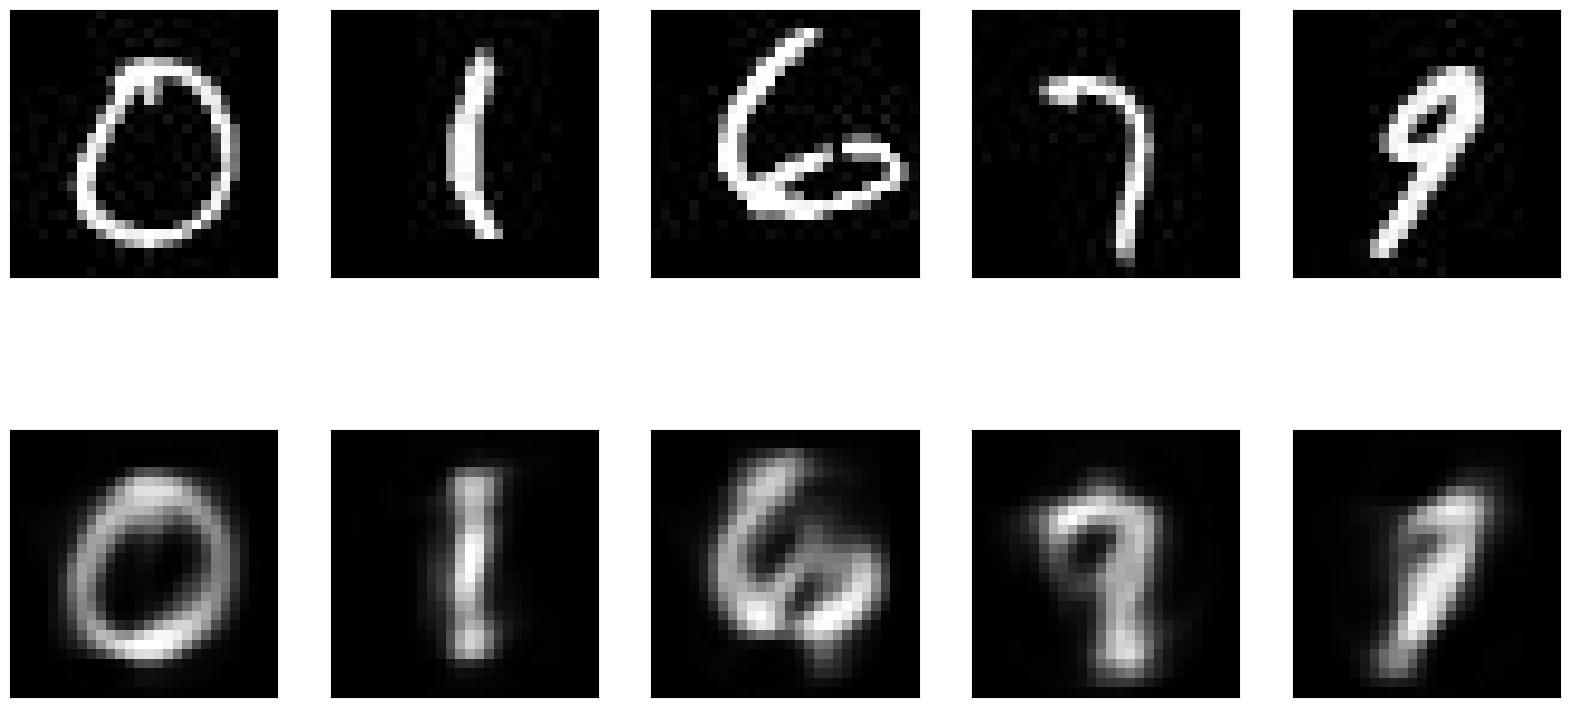

In [125]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

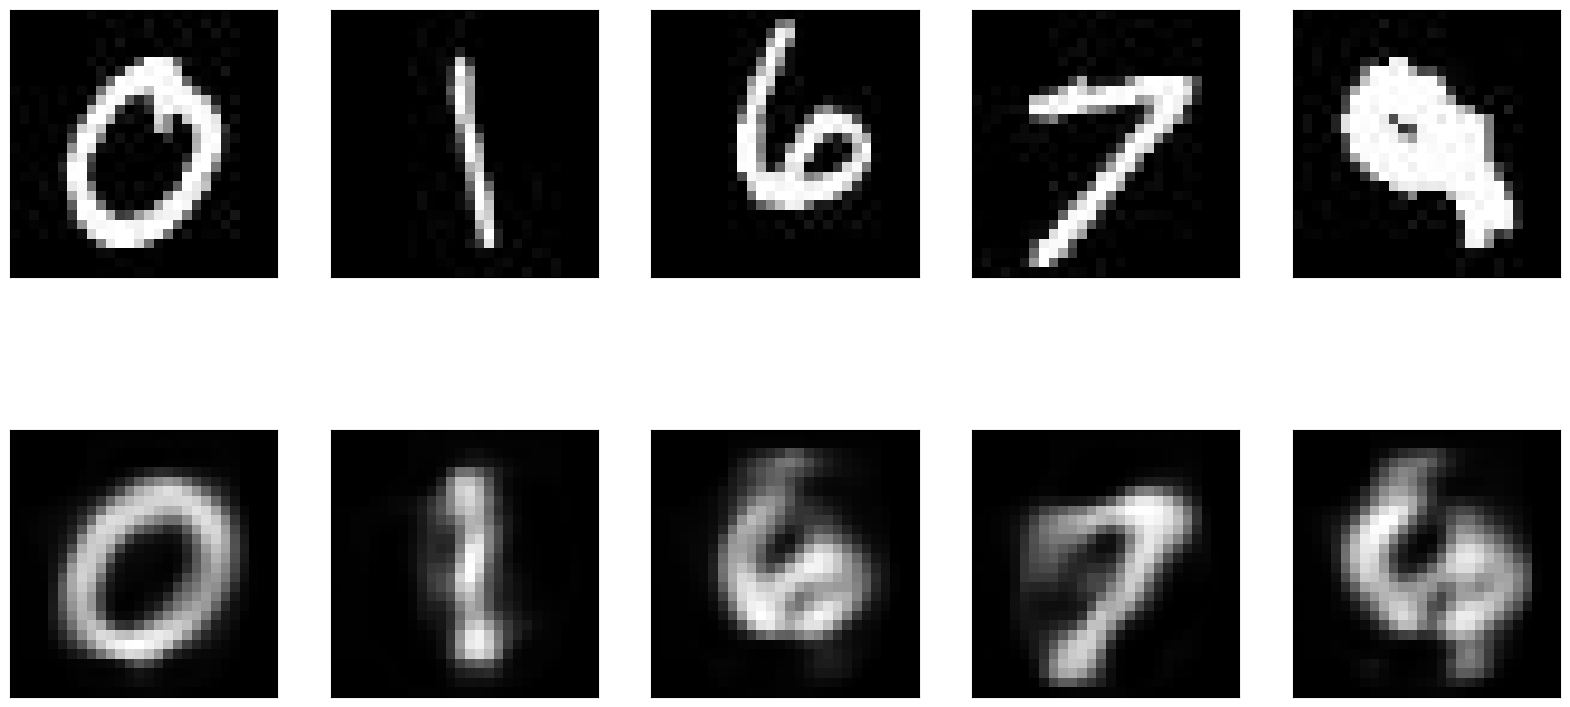

In [127]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

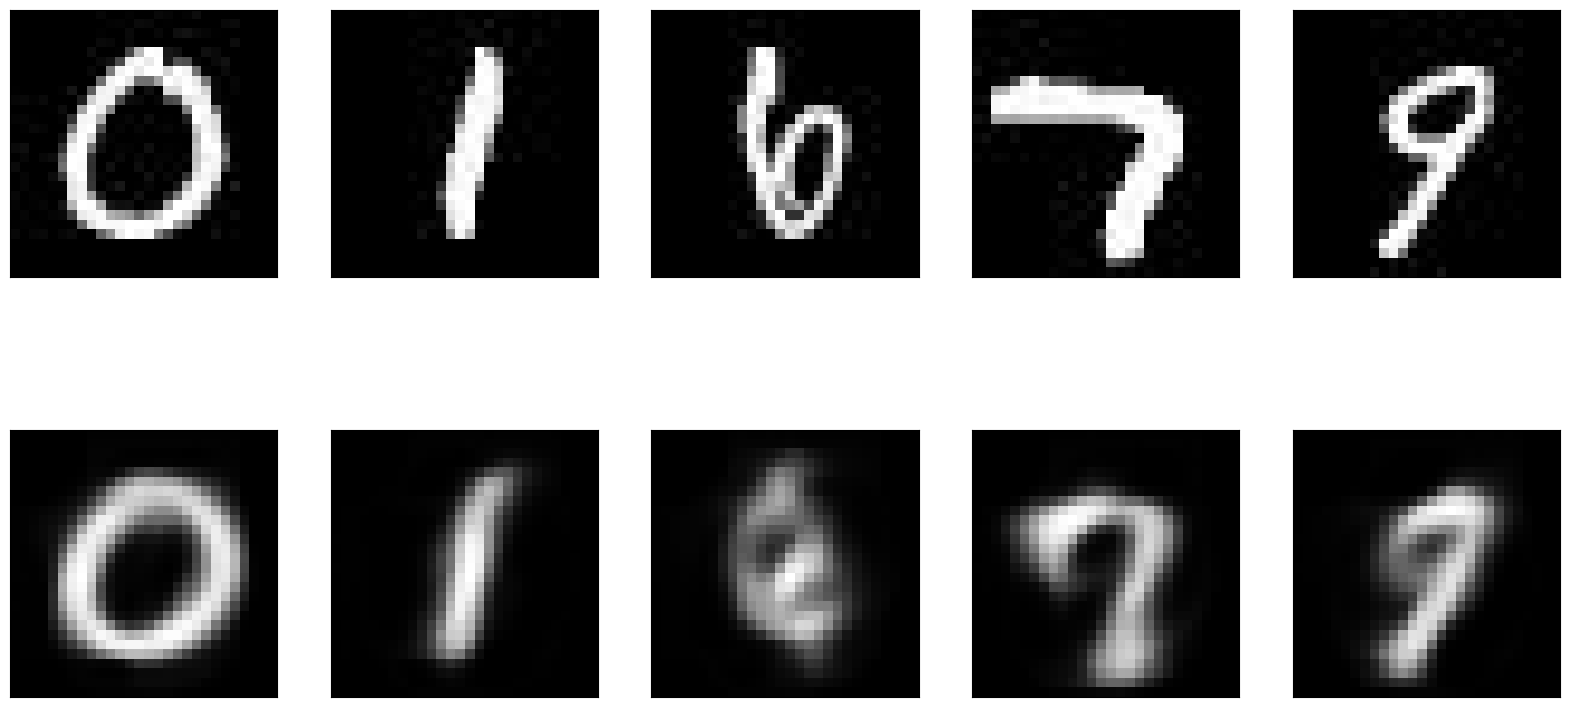

In [128]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct4[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [105]:
#Task-6
#Since 256 is best encoding dimesion so weight visualization from input to compressed layer:
weights4 = Autoencoder4.layers[2].get_weights()[0]
print(weights4.shape)
print(weights4)

(784, 32)
[[-0.03731064 -0.05088928 -0.07779619 ...  0.07089087 -0.0086329
   0.03360461]
 [ 0.00342687 -0.04042657 -0.01220193 ...  0.00171515  0.03393708
  -0.1531146 ]
 [-0.04795632 -0.00526204  0.0596896  ... -0.04498846 -0.00329794
  -0.08461997]
 ...
 [ 0.02913452 -0.06750827  0.05430612 ...  0.02932543 -0.03074035
  -0.06789331]
 [ 0.03872919 -0.0564137   0.04034858 ...  0.07321972 -0.07090809
  -0.12858024]
 [ 0.05229739  0.04301503  0.04446548 ... -0.06062477 -0.01216567
   0.10525621]]


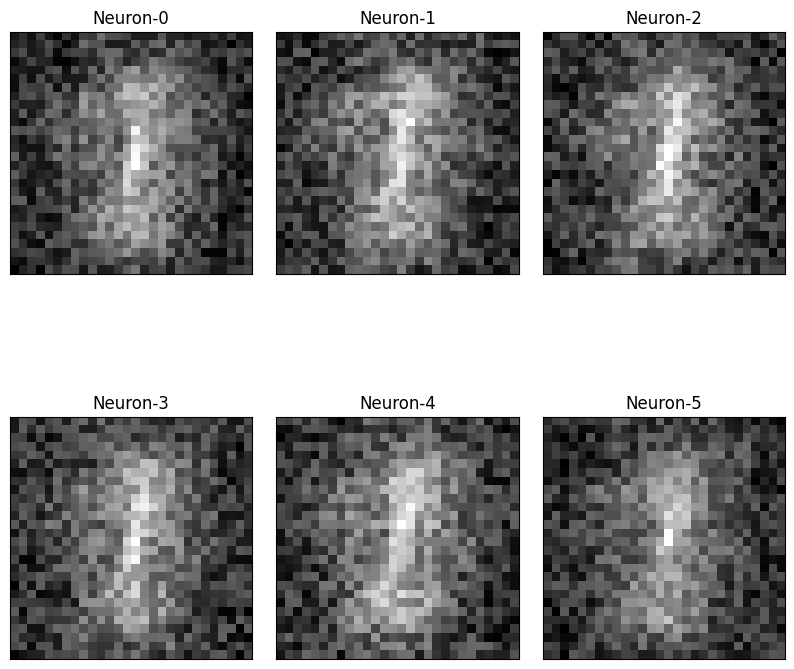

In [106]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights4.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

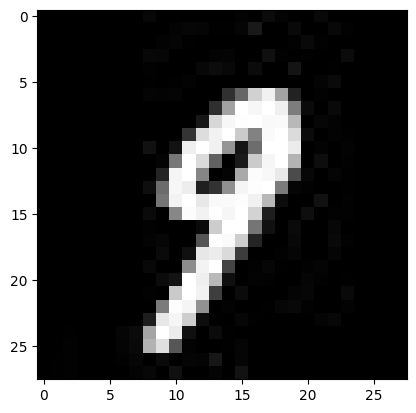

In [65]:
plt.imshow(Input_train_Dataset[0].reshape(28,28),cmap='gray')

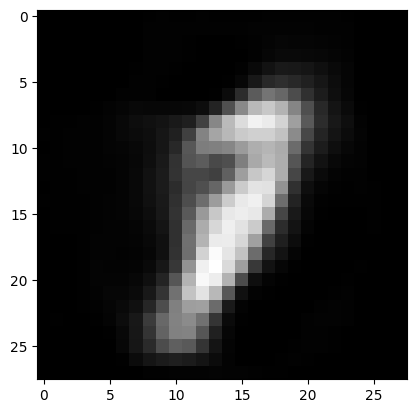

In [66]:
plt.imshow(trainReconstruct4[0].reshape(28,28),cmap='gray')

In [67]:
'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode4=Encoder4.predict(Input_train_Dataset)
valEncode4=Encoder4.predict(Input_val_Dataset)
testEncode4=Encoder4.predict(Input_test_Dataset)

'''Fcnn'''
model4 = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model4.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit4 = model4.fit(x = trainEncode4, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode4,  Output_val), validation_batch_size=1)

model4.save('/Users/vds/Downloads/modelAssign4/ae32.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae32.pckl','wb')
p.dump(model_fit4.history,f)
f.close()

119/119 [==============================] - 0s 619us/step
Epoch 1/10000
356/356 [==============================] - 5s 14ms/step - loss: 1.2363 - accuracy: 0.4446 - val_loss: 0.4449 - val_accuracy: 0.8018
Epoch 2/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.3614 - accuracy: 0.8534 - val_loss: 0.5008 - val_accuracy: 0.8329
Epoch 3/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.3251 - accuracy: 0.8698 - val_loss: 0.2963 - val_accuracy: 0.8917
Epoch 4/10000
356/356 [==============================] - 5s 13ms/step - loss: 0.2990 - accuracy: 0.8859 - val_loss: 0.2768 - val_accuracy: 0.8957
Epoch 5/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.2874 - accuracy: 0.8921 - val_loss: 0.3024 - val_accuracy: 0.8883
Epoch 6/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.2874 - accuracy: 0.8917 - val_loss: 0.2834 - val_accuracy: 0.8917
Epoch 7/10000
356/356 [==============================] - 5s 14ms/st

In [68]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc4=model4.evaluate(x=trainEncode4,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(trainAcc4)

print('\nEvaluation of model on validation data:')
valAcc4=model4.evaluate(x=valEncode4, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(valAcc4)

print('\nEvaluation of model on test data:')
testAcc4=model4.evaluate(x=testEncode4, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model4.metrics_names)
print(testAcc4)

print('\nPredictions for test data:')
testProb4=model4.predict(testEncode4, batch_size=1, verbose="auto", callbacks=None)
pred4=np.argmax(testProb4,axis=1)
print(pred4)


Evaluation of model on train data:
11385/11385 [==============================] - 9s 771us/step - loss: 0.2654 - accuracy: 0.8962
['loss', 'accuracy']
[0.2654126286506653, 0.89617919921875]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 774us/step - loss: 0.2702 - accuracy: 0.8943
['loss', 'accuracy']
[0.2702125906944275, 0.8943346738815308]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 772us/step - loss: 0.2923 - accuracy: 0.8875
['loss', 'accuracy']
[0.29231294989585876, 0.887483537197113]

Predictions for test data:
3795/3795 [==============================] - 3s 662us/step
[3 3 4 ... 1 1 1]


In [69]:
#3-3
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix4=tf.math.confusion_matrix(Output_test,pred4)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix4)

tf.Tensor(
[[747   0   4   0   8]
 [  0 749   5   2   3]
 [ 42  32 667   2  16]
 [  4  14   1 669  71]
 [ 15   6   1 201 536]], shape=(5, 5), dtype=int32)
